In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('Datasets/List of Regular Travelers in the Philippines.csv', delimiter=',')

In [3]:
dataset

,region,province_or_city,foreign_travelers,overseas_filipino,domestic_travelers,total_2012
0,NCR (National Capital Region),NCR (National Capital Region),1513402,20048,909212,2442662
1,NCR (National Capital Region),Caloocan City,-,-,-,0
2,NCR (National Capital Region),Las Pinas City,-,-,-,0
3,NCR (National Capital Region),Makati City,-,-,-,0
4,NCR (National Capital Region),Malabon City,-,-,-,0
...,...,...,...,...,...,...
338,DISTRIBUTION OF REGIONAL TRAVELLERS IN THE PHI...,NaN,NaN,NaN,NaN,NaN
339,January-December 2012,NaN,NaN,NaN,NaN,NaN
340,Source of Data: Accommodation Establishments ...,NaN,NaN,NaN,NaN,NaN
341,Prepared by: Tourism Research and Statistics ...,NaN,NaN,NaN,NaN,NaN


In [4]:
types_of_people = ["Foreign Travelers", "Overseas Filipino", "Domestic Travelers"]
total_population = [0,0,0]
condition = "NCR (National Capital Region)"

In [5]:
total_population[0] = int(dataset['foreign_travelers'].iloc[0])
total_population[1] = int(dataset['overseas_filipino'].iloc[0])
total_population[2] = int(dataset['domestic_travelers'].iloc[0])

In [6]:
total_population

[1513402, 20048, 909212]

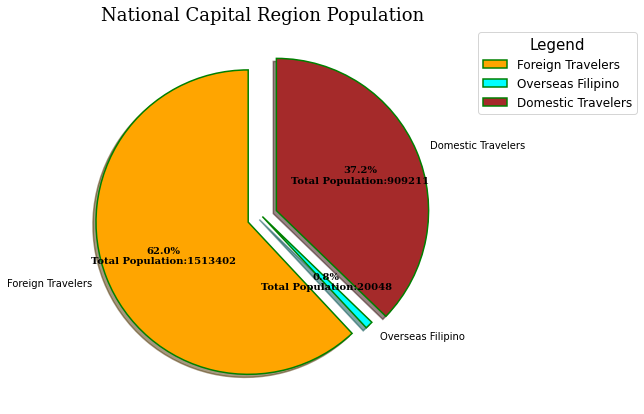

In [7]:
# Creating explode data
explode = (0.1, 0.0, 0.1)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown")
 
# Wedge properties
wp = { 'linewidth' : 1.5, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\nTotal Population:{:d}".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(15, 7))
wedges, texts, autotexts = ax.pie(total_population,
                                  autopct = lambda pct: func(pct, total_population),
                                  explode = explode,
                                  labels = types_of_people,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
legend = plt.legend(types_of_people,bbox_to_anchor =(1, 0, 0.5, 1), fontsize = 12)
legend.set_title("Legend", prop = {'size':15})
plt.setp(autotexts, size = 10, weight ="bold", family = "serif")
ax.set_title("National Capital Region Population", fontsize = 18, family = "serif")
plt.show()

In [8]:
Regions = ['NCR (National Capital Region)', 'CAR (Cordillera Administrative Region)', 'I (Ilocos Region)', 'II (Cagayan Valley)'
          ,'III (Central Luzon)', 'IV-A (CALABARZON)', 'V (Bicol Region)', 'VI (Western Visayas)', 'VII (Central Visayas)',
          'VIII (Eastern Visayas)', 'IX (Zamboanga Peninsula)', 'X (Northern Mindanao)', 'XI (Davao Region)', 'XII (SOCCSKSARGEN)',
          'Region XIII (CARAGA)']

In [9]:
tester = '-'

In [10]:
len(Regions)

15

In [12]:
Foreigner_Population_Region =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
dataset['foreign_travelers'] = dataset['foreign_travelers'].fillna(0)
for i in range (0,15):
    for x in range (0,343):
        if(dataset['region'].iloc[x] == Regions[i]):
            if(dataset['foreign_travelers'].iloc[x] == tester or dataset['foreign_travelers'].iloc[x] == ' -   '):
                pass
            else:
                Foreigner_Population_Region[i] += int(dataset['foreign_travelers'].iloc[x])

                

In [13]:
Foreigner_Population_Region

[1513402,
 155826,
 108516,
 34168,
 957715,
 162052,
 1595830,
 1693630,
 2555727,
 75283,
 112034,
 107449,
 169385,
 26245,
 115338]

In [14]:
Foreigner_Population_Region = sorted(Foreigner_Population_Region)

In [15]:
Foreigner_Population_Region = [Foreigner_Population_Region[len(Regions)-1], Foreigner_Population_Region[len(Regions)-2], 
                                Foreigner_Population_Region[len(Regions)-3], Foreigner_Population_Region[len(Regions)-4],
                                Foreigner_Population_Region[len(Regions)-5]]

In [16]:
Regions = [Regions[6], Regions[7], Regions[8],Regions[14], Regions[10]]

In [17]:
Foreigner_Population_Region

[2555727, 1693630, 1595830, 1513402, 957715]

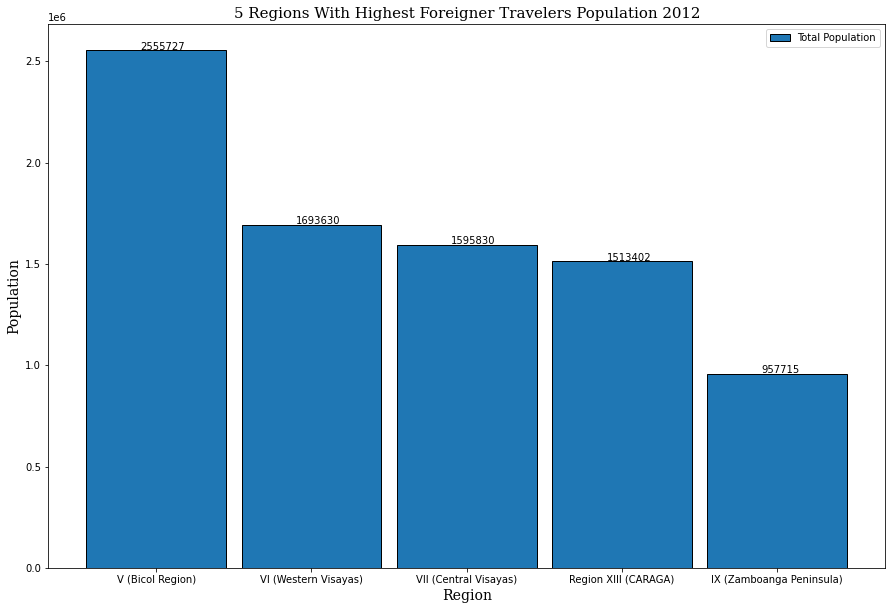

In [20]:
plt.figure(figsize = (15,10))

plt.bar(Regions, Foreigner_Population_Region, width= 0.9, align='center', edgecolor = 'black')
# This is the location for the annotated text
i = 1.0
j = 2000
# Annotating the bar plot with the values (total death count)
for i in range(len(Regions)):
    plt.annotate(Foreigner_Population_Region[i], (-0.1 + i, Foreigner_Population_Region[i] + j))
# Creating the legend of the bars in the plot
plt.legend(labels = ['Total Population'], fontsize = 10)
# Giving the tilte for the plot
plt.title("5 Regions With Highest Foreigner Travelers Population 2012", fontsize = 15, family = 'serif')
# Namimg the x and y axis
plt.xlabel('Region', fontsize = 14, family = 'serif')
plt.ylabel('Population', fontsize = 14, family = 'serif')

plt.show()